In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [2]:
df = pd.read_csv('/content/tips (data for regression problem).csv')

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [4]:
X = df.drop(columns=['tip'])
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

print('Linear Regression R2:', r2_score(y_test, y_pred_linear))
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_linear))

Linear Regression R2: 0.43730181943482493
Linear Regression MSE: 0.7033566017436106


In [6]:
#Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))
print('Ridge Regression MSE:', mean_squared_error(y_test, y_pred_ridge))

Ridge Regression R2: 0.4393889716178484
Ridge Regression MSE: 0.7007477213216077


In [7]:
#Lasso Regression
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))
print('Lasso Regression MSE:', mean_squared_error(y_test, y_pred_lasso))

Lasso Regression R2: 0.45668627024964514
Lasso Regression MSE: 0.6791265936812352


In [8]:
#Decision tree Regression
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

print('Decision Tree R2:', r2_score(y_test, y_pred_tree))
print('Decision Tree MSE:', mean_squared_error(y_test, y_pred_tree))

Decision Tree R2: 0.07170769962173551
Decision Tree MSE: 1.1603387755102041


In [9]:
#Random forest Regression
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

y_pred_forest = forest_reg.predict(X_test)

print('Random Forest R2:', r2_score(y_test, y_pred_forest))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_forest))

Random Forest R2: 0.30510316356106615
Random Forest MSE: 0.8686011334693892


In [10]:
#Support Vector Regression (SVR)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

print('SVR R2:', r2_score(y_test, y_pred_svr))
print('SVR MSE:', mean_squared_error(y_test, y_pred_svr))

SVR R2: 0.35319430183701783
SVR MSE: 0.8084885886628975


In [11]:
# K-Nearest Neighbours Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)

print('KNN R2:', r2_score(y_test, y_pred_knn))
print('KNN MSE:', mean_squared_error(y_test, y_pred_knn))

KNN R2: 0.29888587066985495
KNN MSE: 0.8763725714285714


### ***Based on the R2 score and error values, the best models are Linear, Ridge and Lasso regression models. SVR and Random Forest are moderate models. While Decision Trees and KNN are poor/weak models.***

In [12]:
#Feature Importance
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

feature_importance = pd.Series(ridge_reg.coef_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

size          0.231672
total_bill    0.094663
time_Lunch    0.077974
sex_Male      0.027293
day_Sun      -0.031384
day_Thur     -0.142421
day_Sat      -0.166963
smoker_Yes   -0.184359
dtype: float64


### **We concluded previously that Ridge Regression is one of the best models that fits the given data, hence, using ridge regression, to find the importance of features. Above shows the coefficients of features obtained by fitting ridge regression. Higher the value of coefficient, higher is the importance of that corresponding feature.**

### **From above, we can see that 'size' (number of people dining) feature is the most significant feature that affects tip-amount.**

### **Insights for Management :**

### **Encourage group dining by offering promotions for larger parties, as tip amounts increase with group size.**

### **Make sure experienced staff serve large groups for the best service.**

### **Use digital payment options with tip suggestions to make tipping easy and improve customer satisfaction and overall earnings.**

# **Part - 2: Check if the data follows a linear trend using...**

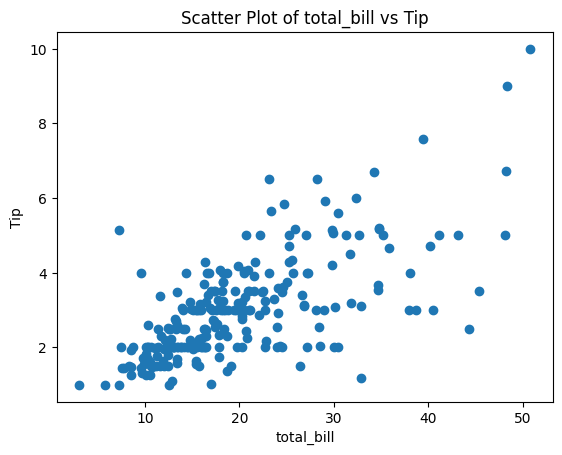

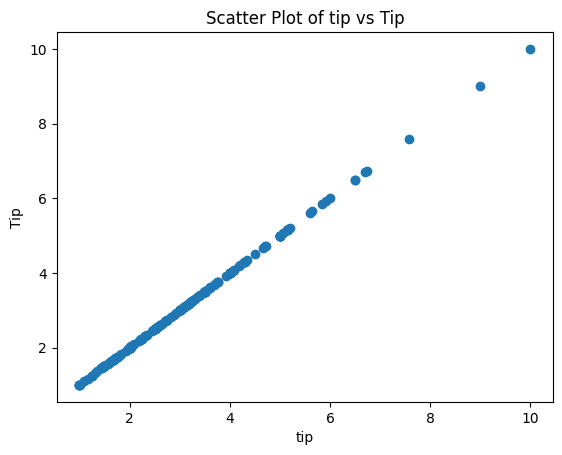

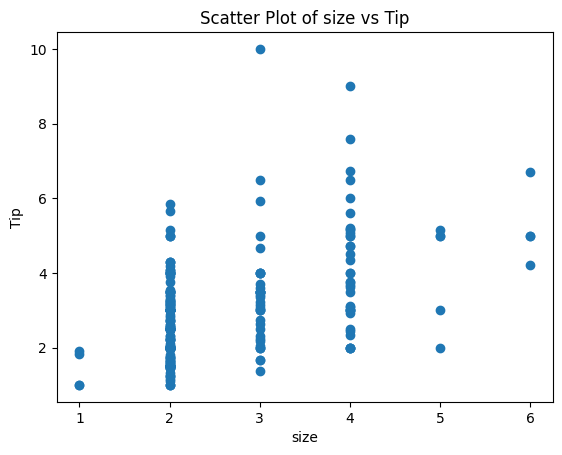

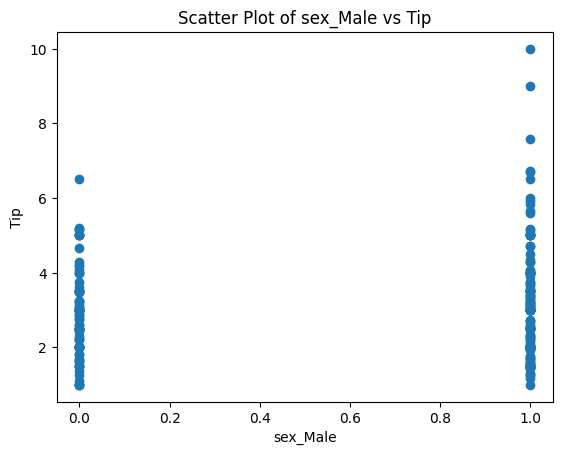

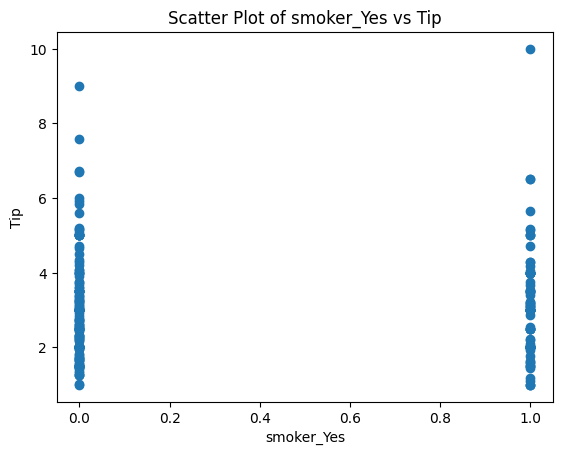

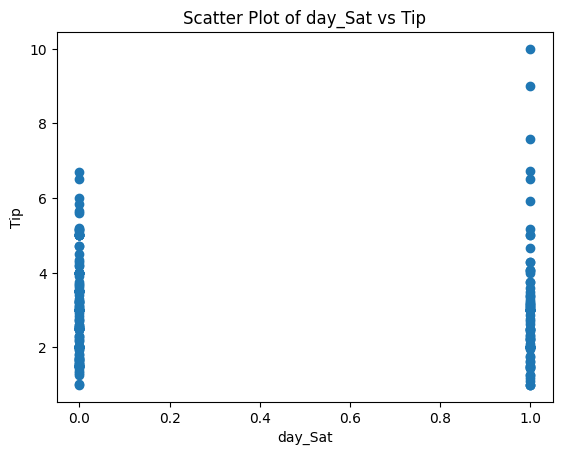

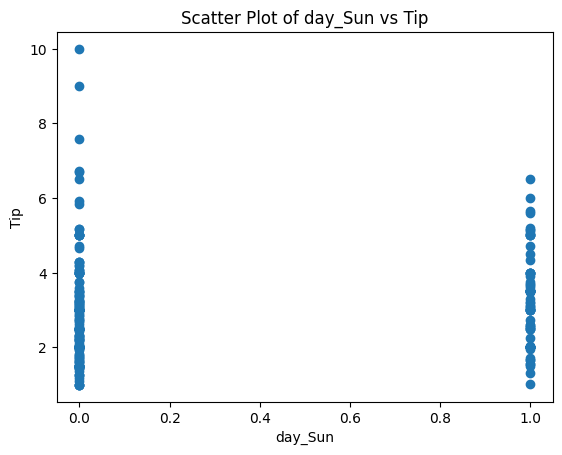

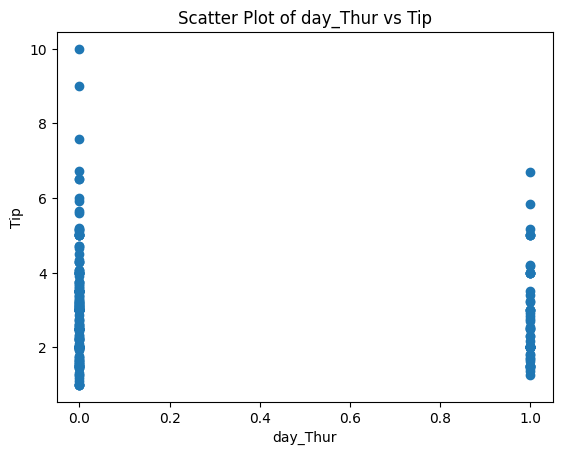

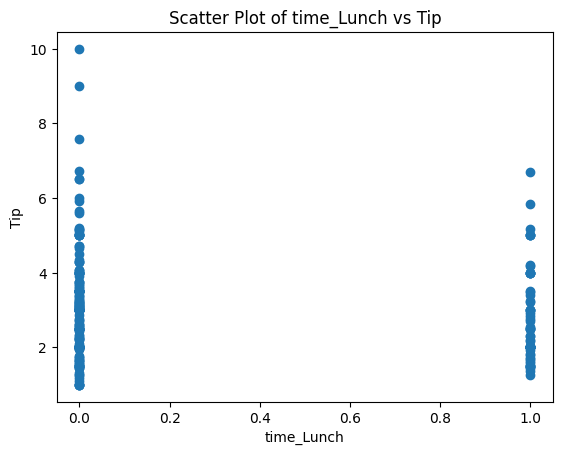

In [13]:
#Scatter plot
for column in df.columns:
    plt.scatter(df[column], df['tip'])
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.title(f'Scatter Plot of {column} vs Tip')
    plt.show()

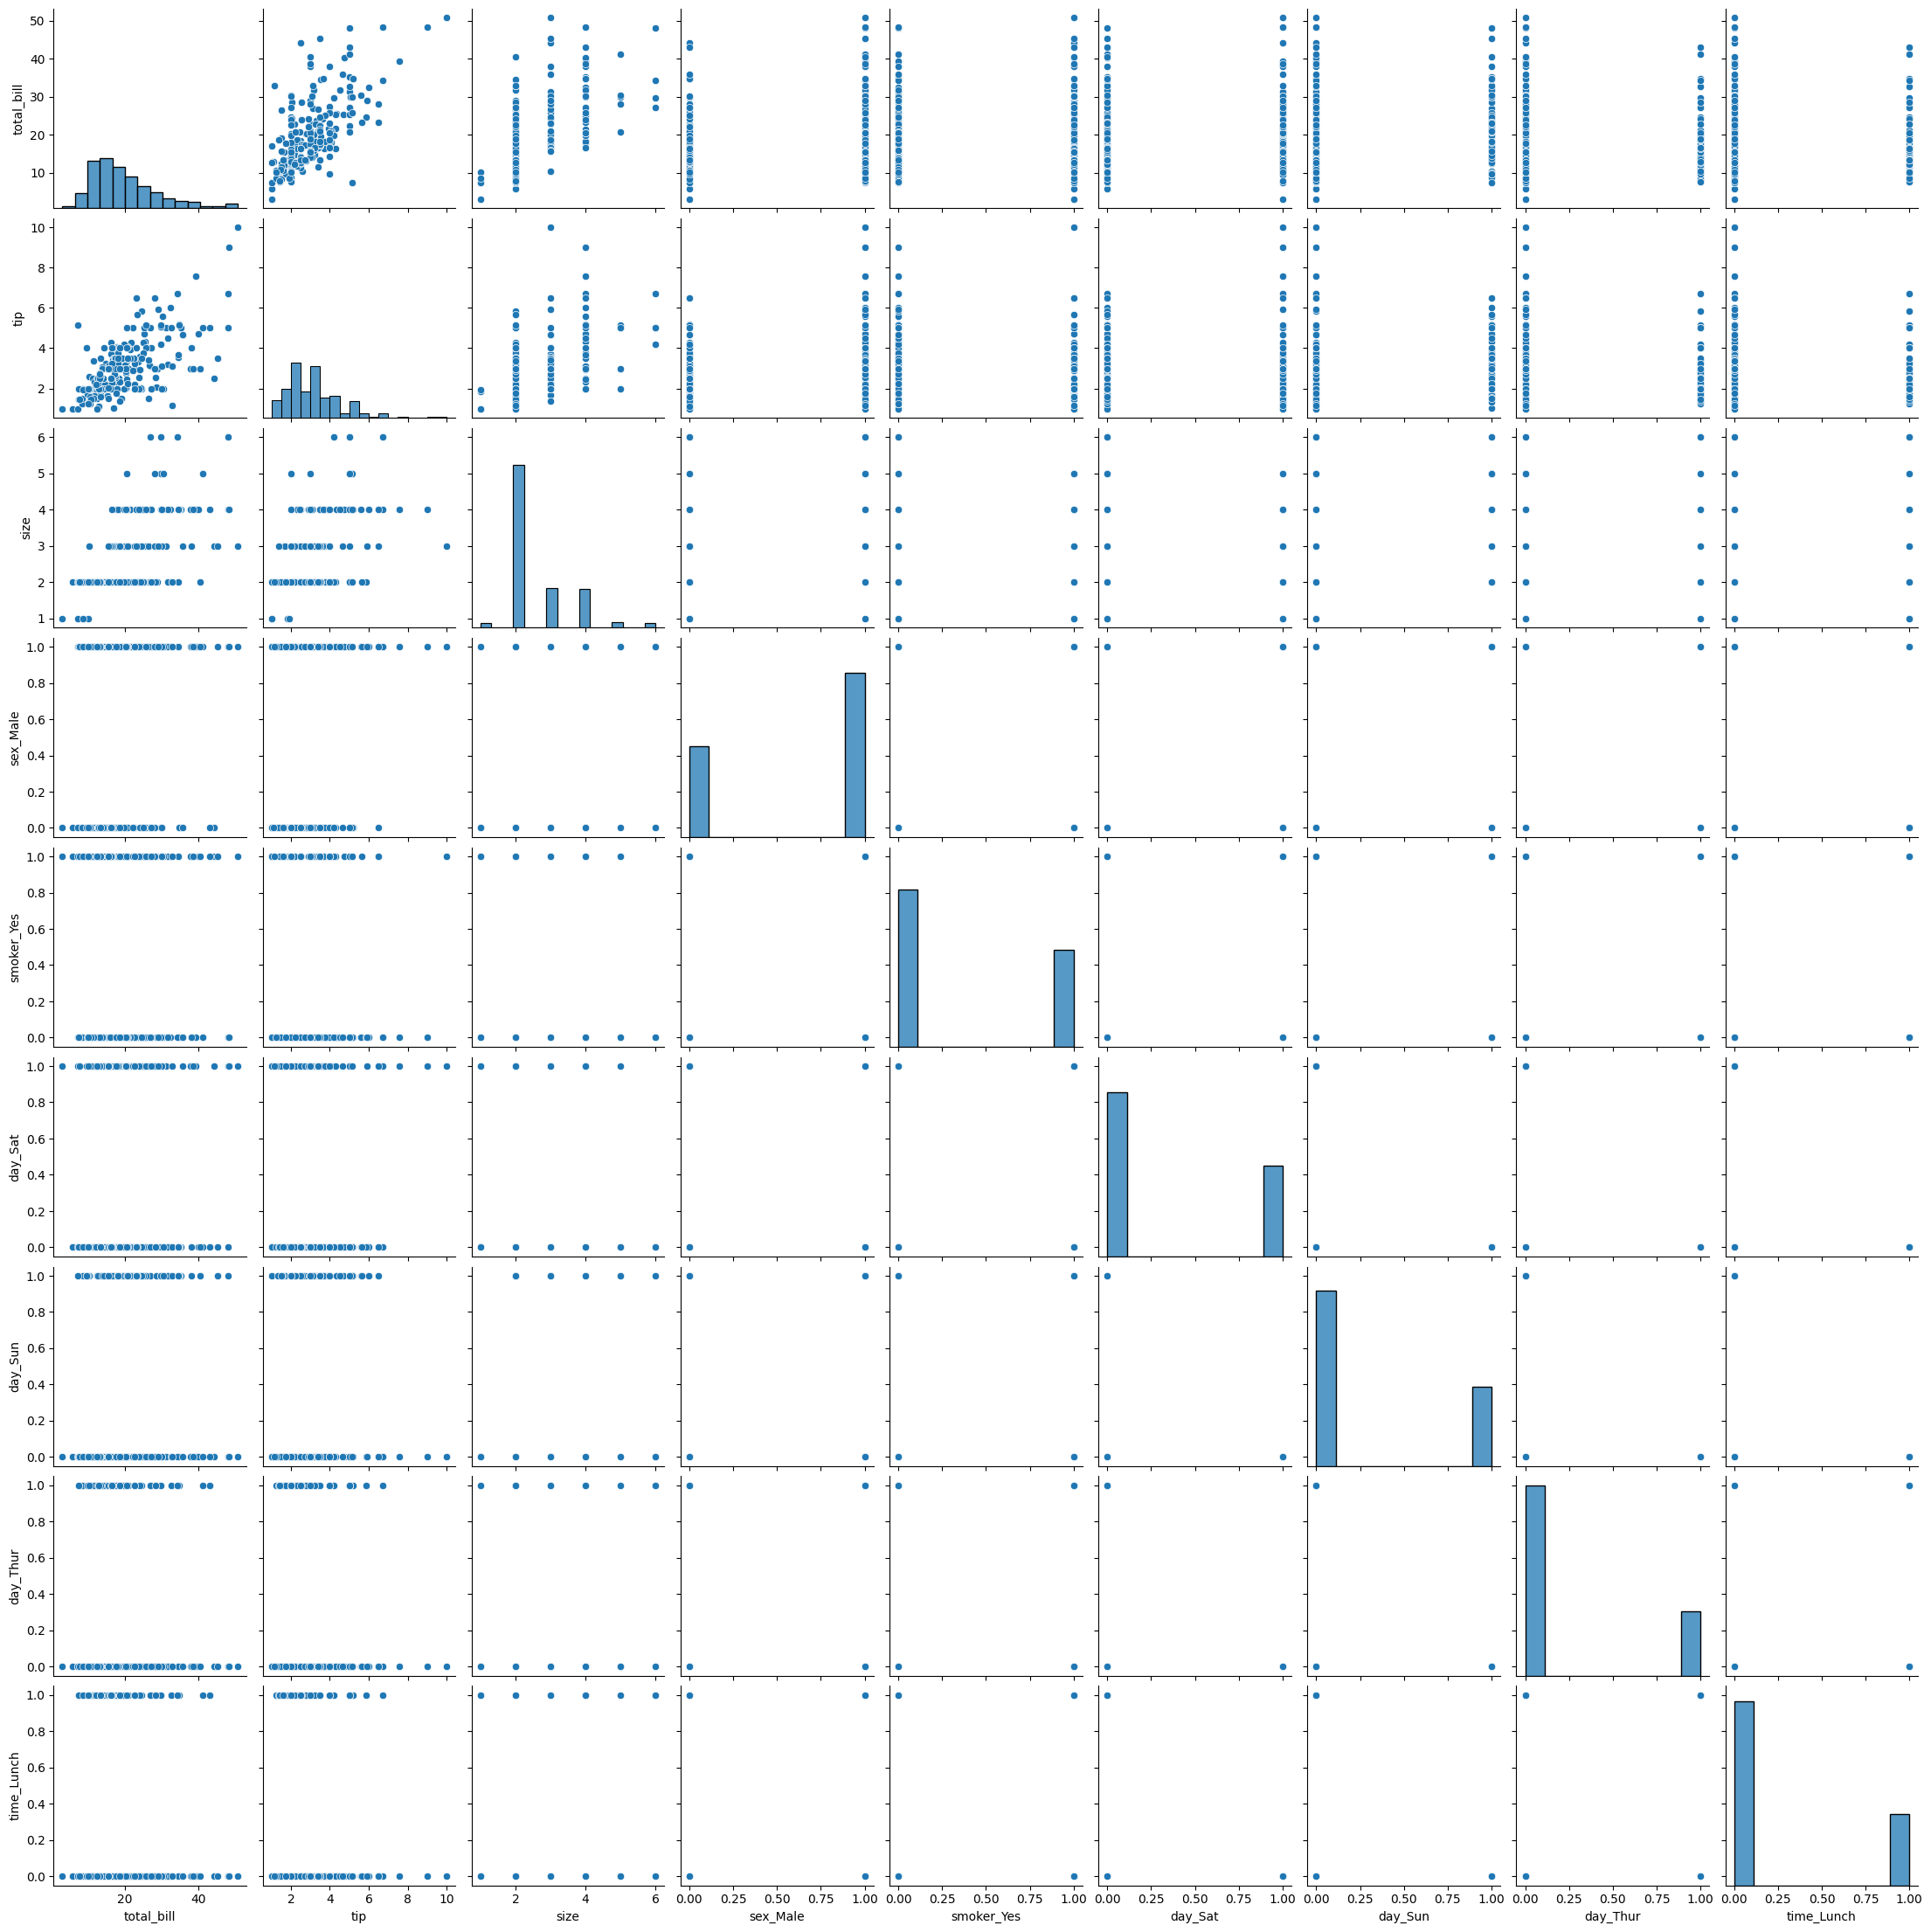

In [14]:
# Pair plot
sns.pairplot(df)
plt.show()

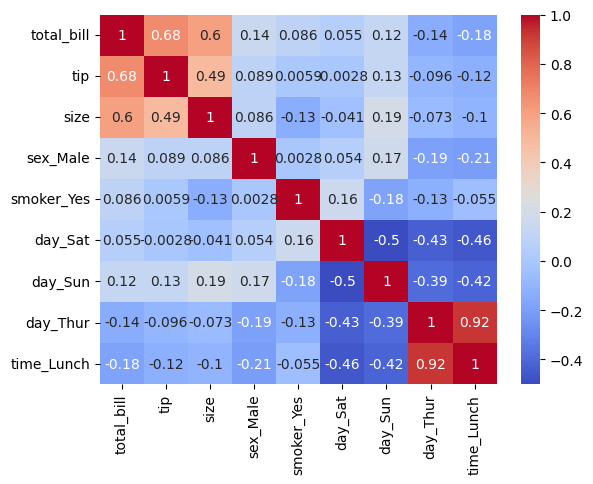

In [15]:
# Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [16]:
# Statistical Tests for Linearity (Rainbow Test)
X = df.drop(columns=['tip']).astype(float)
y = df['tip']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

test_statistic, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_statistic}")
print(f"Rainbow Test p-value: {p_value}")

if p_value < 0.05:
    print("The relationship between the target and feature variables is not linear.")
else:
    print("The relationship between the target and feature variables is linear.")


Rainbow Test Statistic: 1.197054547994589
Rainbow Test p-value: 0.1658838305924099
The relationship between the target and feature variables is linear.


### **According to above test, relationship between the target and feature variables is linear.**


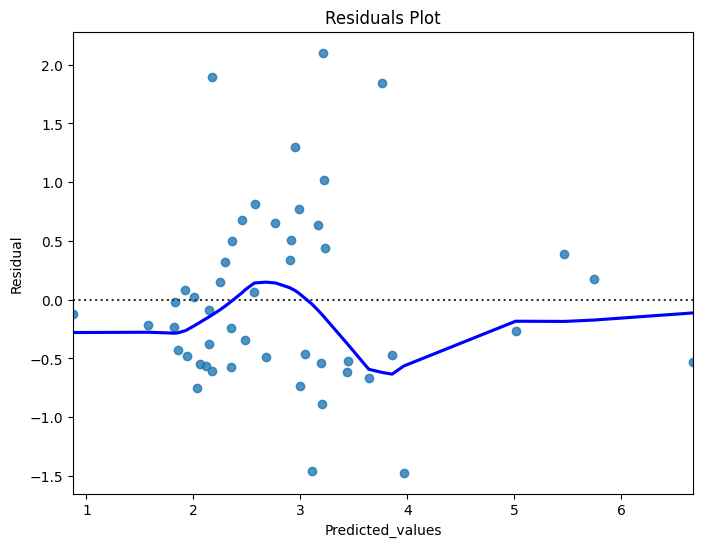

In [17]:
# Residuals Plot
model = linear_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'blue'})
plt.title('Residuals Plot')
plt.xlabel('Predicted_values')
plt.ylabel('Residual')
plt.show()


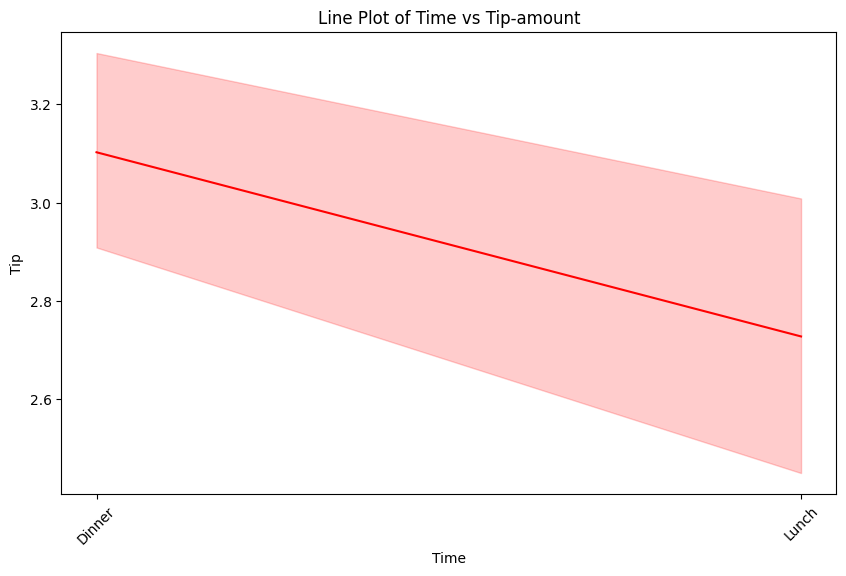

In [18]:
# Line Plot (for time-series data)
df = pd.read_csv('/content/tips (data for regression problem).csv')

plt.figure(figsize=(10,6))
sns.lineplot(x='time', y='tip', data=df,color='red')
plt.title('Line Plot of Time vs Tip-amount')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Based on the trend in data apply suitable regression method and check model prediction accuracy.

df = pd.read_csv('/content/tips (data for regression problem).csv')

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

X = df.drop(columns='tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

best_models = {}
evaluation = {}
y_pred = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred[model_name] = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred[model_name])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred[model_name])
    r2 = r2_score(y_test, y_pred[model_name])

    evaluation[model_name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Print the evaluation results
for model_name, metrics in evaluation.items():
    print(f"{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


Linear Evaluation Metrics:
MSE: 0.7034
RMSE: 0.8387
MAE: 0.6671
R2: 0.4373


Ridge Evaluation Metrics:
MSE: 0.7007
RMSE: 0.8371
MAE: 0.6665
R2: 0.4394


Lasso Evaluation Metrics:
MSE: 0.5666
RMSE: 0.7527
MAE: 0.6256
R2: 0.5467


